In [42]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler


#데이터 분할
from sklearn.model_selection import train_test_split
#LightGBM 패키지 불러오기
from lightgbm import LGBMClassifier

#변수 중요도 확인: F1 점수 기준
from lightgbm import plot_importance
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

from subprocess import call
from IPython.display import Image
#로지스틱 회귀
from statsmodels.api import Logit
#분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score,recall_score, f1_score,roc_curve,auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

import scipy.stats as stats

from scipy.stats import chi2_contingency

%matplotlib inline
matplotlib.rc('font',family = 'Noto Sans CJK JP')
#-기호 false다
matplotlib.rc('axes',unicode_minus = False)

In [43]:
df  = pd.read_csv("/home/piai/다운로드/path_defect.csv", encoding='UTF-8')
df

,path,count,Target,불량률,Unnamed: 4
0,22222,44,4758,0.054068,NaN
1,23222,43,4692,0.054558,NaN
2,13222,42,4151,0.049417,NaN
3,21222,42,4430,0.052738,NaN
4,32222,42,4658,0.055452,NaN
...,...,...,...,...,...
76,32322,9,904,0.050222,NaN
77,33122,9,597,0.033167,NaN
78,33211,9,768,0.042667,NaN
79,33233,9,812,0.045111,NaN


In [44]:
df = df.drop(columns=['Unnamed: 4'])

In [45]:
df

,path,count,Target,불량률
0,22222,44,4758,0.054068
1,23222,43,4692,0.054558
2,13222,42,4151,0.049417
3,21222,42,4430,0.052738
4,32222,42,4658,0.055452
...,...,...,...,...
76,32322,9,904,0.050222
77,33122,9,597,0.033167
78,33211,9,768,0.042667
79,33233,9,812,0.045111


In [46]:
result = df.groupby('count')['불량률'].mean().reset_index()

print(result)

    count       불량률
0       9  0.051350
1      11  0.042886
2      12  0.048853
3      18  0.072472
4      20  0.065875
5      22  0.059932
6      24  0.065667
7      25  0.049475
8      26  0.050869
9      28  0.053208
10     29  0.050116
11     30  0.046592
12     32  0.060609
13     34  0.037132
14     35  0.055157
15     41  0.047085
16     42  0.052536
17     43  0.054558
18     44  0.054068


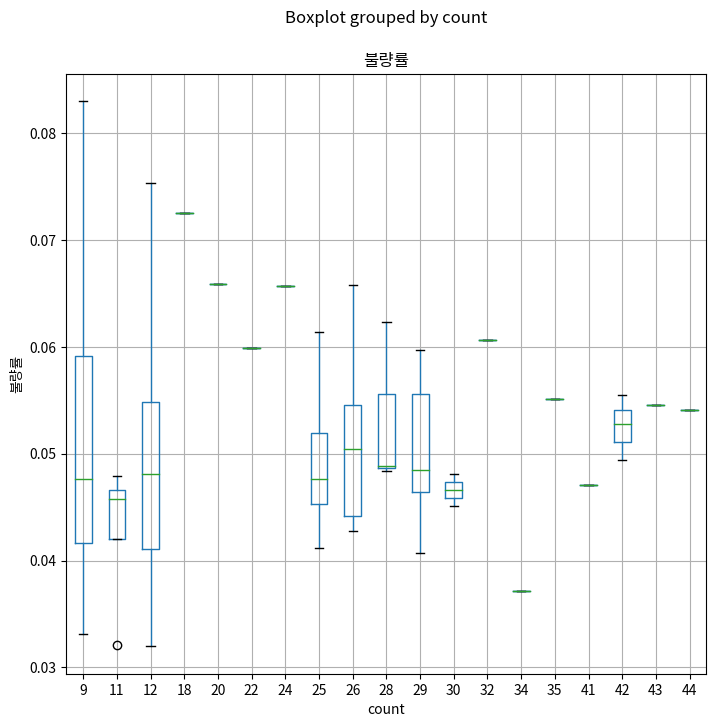

In [47]:
fig, ax = plt.subplots(figsize=(8, 8))
df.boxplot(column='불량률', by='count', ax=ax)
ax.set_xlabel('count')
ax.set_ylabel('불량률')
plt.show()

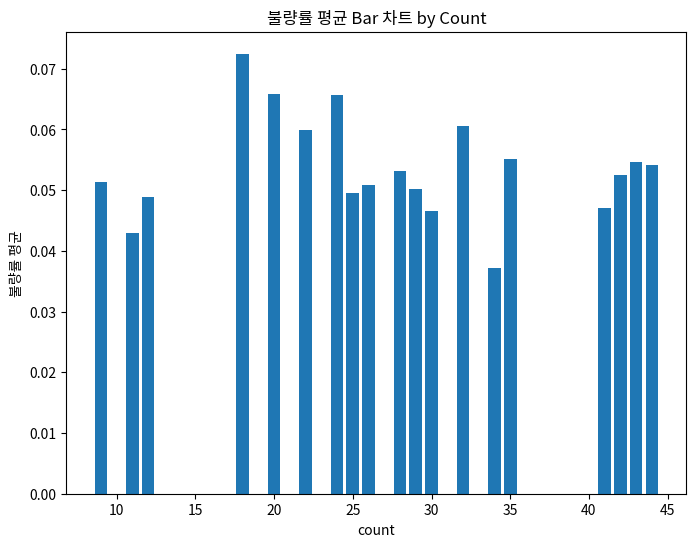

In [48]:
plt.figure(figsize=(8, 6))
plt.bar(result['count'], result['불량률'])
plt.xlabel('count')
plt.ylabel('불량률 평균')
plt.title('불량률 평균 Bar 차트 by Count')
plt.show()

In [52]:
df_rp = df["path"].value_counts()


top8_rp = df_rp.head(8)
bottom8_rp = df_rp.tail(8)
top_bottom_counts = pd.concat([top8_rp, bottom8_rp])

plt.figure(figsize=(20, 20))
plt.bar(top_bottom_counts, result.loc[top_bottom_counts.index, '불량률'])
plt.xlabel('count')
plt.ylabel('불량률 평균')
plt.title('상위 8개와 하위 8개 Count에 대한 불량률 평균 Bar 차트')
plt.xticks(rotation=45)
plt.show()

KeyError: "None of [Int64Index([22222, 22133, 22122, 21322, 21233, 21122, 13322, 13211, 31111,\n            23333, 23311, 23111, 22333, 21333, 13333, 33322],\n           dtype='int64')] are in the [index]"

<Figure size 2000x2000 with 0 Axes>

In [53]:
top8_rp

22222    1
22133    1
22122    1
21322    1
21233    1
21122    1
13322    1
13211    1
Name: path, dtype: int64

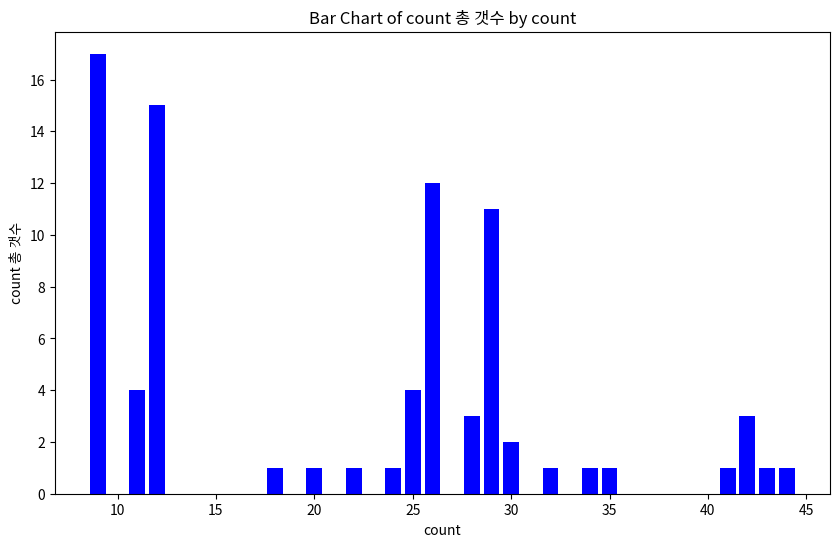

In [ ]:
# count를 기준으로 그룹화하여 갯수 계산
grouped = df.groupby('count').size().reset_index(name='count_total')

# 바차트 그리기
plt.figure(figsize=(10, 6))
plt.bar(grouped['count'], grouped['count_total'], color='blue')
plt.xlabel('count')
plt.ylabel('count 총 갯수')
plt.title('Bar Chart of count 총 갯수 by count')
plt.show()

In [ ]:
count_of_9 = (df['count'] == 9).sum()
print(f"'count' 값이 9인 데이터의 개수: {count_of_9}")

'count' 값이 9인 데이터의 개수: 17


다시 시작!!!

In [ ]:
df['sum'] = df['count']
df

,path,count,Target,불량률,sum
0,22222,44,4758,0.054068,44
1,23222,43,4692,0.054558,43
2,13222,42,4151,0.049417,42
3,21222,42,4430,0.052738,42
4,32222,42,4658,0.055452,42
...,...,...,...,...,...
76,32322,9,904,0.050222,9
77,33122,9,597,0.033167,9
78,33211,9,768,0.042667,9
79,33233,9,812,0.045111,9


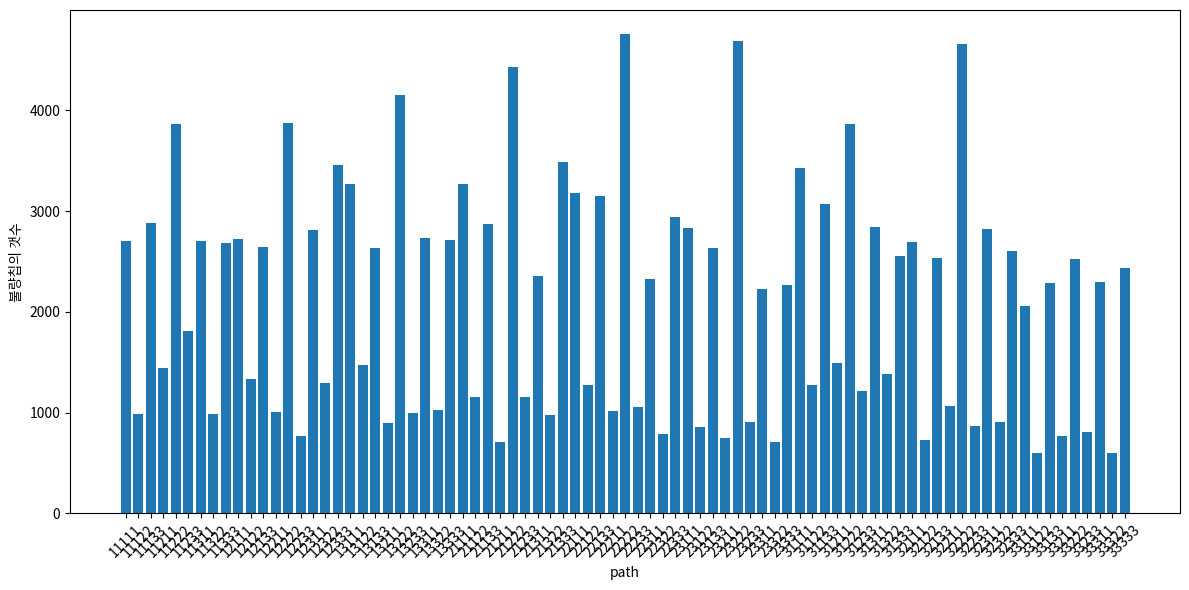

In [ ]:
df_sorted = df.sort_values(by='path')

plt.figure(figsize=(12, 6))
plt.bar(df_sorted['path'].astype(str), df_sorted['Target'])
plt.xlabel('path')
plt.ylabel('불량칩의 갯수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

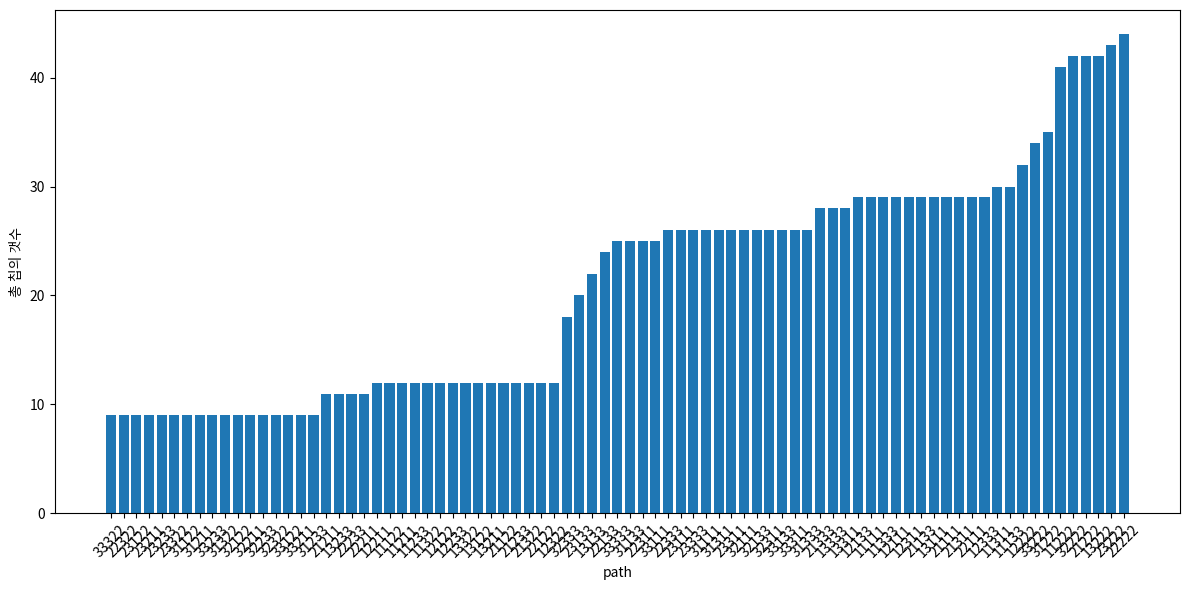

In [ ]:
df_sorted = df.sort_values(by='sum')

plt.figure(figsize=(12, 6))
plt.bar(df_sorted['path'].astype(str), df_sorted['sum'])
plt.xlabel('path')
plt.ylabel('총 칩의 갯수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df =pd.DataFrame({'A':[323471,91491], 'B':[18538, 4419]})
# 카이제곱
chi2, pval, dof, expected = chi2_contingency(df)

# 결과 출력
print("chi-square test")
print('chisq : {0:0.3f}'.format(chi2))
print('p : {0:0.3f}'.format(pval))
print('degree pf freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

chi-square test
chisq : 99.475
p : 0.000
degree pf freedom : 1
expected value : 
[[324079.884  17929.116]
 [ 90882.116   5027.884]]


In [ ]:
# 카이제곱
chi2, pval, dof, expected = chi2_contingency(df)

# 결과 출력
print("chi-square test")
print('chisq : {0:0.3f}'.format(chi2))
print('p : {0:0.3f}'.format(pval))
print('degree pf freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

chi-square test
chisq : 529692.219
p : 0.000
degree pf freedom : 320
expected value : 
[[3.8650601e+04 3.6310000e+01 3.7161420e+03 8.8000000e-02 7.2620912e+04]
 [3.8292066e+04 3.5974000e+01 3.6816700e+03 8.8000000e-02 7.1947257e+04]
 [3.4077678e+04 3.2014000e+01 3.2764690e+03 7.8000000e-02 6.4028810e+04]
 [3.6859604e+04 3.4628000e+01 3.5439430e+03 8.4000000e-02 6.9255793e+04]
 [4.0632459e+04 3.8172000e+01 3.9066920e+03 9.3000000e-02 7.6344639e+04]
 [3.2635807e+04 3.0660000e+01 3.1378370e+03 7.5000000e-02 6.1319668e+04]
 [3.5321969e+04 3.3183000e+01 3.3961040e+03 8.1000000e-02 6.6366718e+04]
 [3.4872701e+04 3.2761000e+01 3.3529080e+03 8.0000000e-02 6.5522586e+04]
 [2.6926463e+04 2.5296000e+01 2.5889010e+03 6.2000000e-02 5.0592339e+04]
 [2.4881766e+04 2.3375000e+01 2.3923090e+03 5.7000000e-02 4.6750541e+04]
 [2.4881429e+04 2.3375000e+01 2.3922770e+03 5.7000000e-02 4.6749908e+04]
 [2.4140837e+04 2.2679000e+01 2.3210710e+03 5.5000000e-02 4.5358404e+04]
 [2.4209385e+04 2.2744000e+01 2.32766